In [1]:
import numpy as np
import pandas as pd
import time

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from pathlib import Path

#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk("input"):
    print(dirname)

input
input\evaluation
input\training


In [2]:
#data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
data_path = Path('input/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'
training_tasks = sorted(os.listdir(training_path))
eval_tasks = sorted(os.listdir(evaluation_path))

In [3]:
#已解決的ID
solved_id=set()
solved_eva_id=set()

In [4]:
T = training_tasks
Trains = []
for i in range(400):
    task_file = str(training_path / T[i])
    task = json.load(open(task_file, 'r'))
    Trains.append(task)
    
E = eval_tasks
Evals= []
for i in range(400):
    task_file = str(evaluation_path / E[i])
    task = json.load(open(task_file, 'r'))
    Evals.append(task)

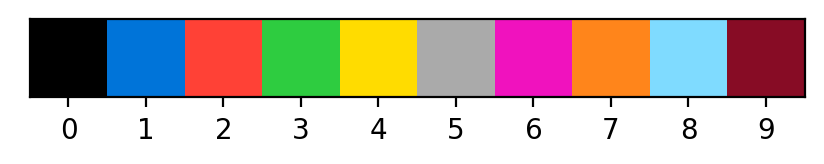

In [5]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [6]:

def plot_picture(x):
    plt.imshow(np.array(x), cmap = cmap, norm = norm)
    plt.show()

In [7]:
def Defensive_Copy(A): 
    if type(A)!=list:
        A=A.tolist()
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [8]:
def Create(task, task_id = 0):
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][i]['input']) for i in range(n)]
    Output = [Defensive_Copy(task['train'][i]['output']) for i in range(n)]
    Input.append(Defensive_Copy(task['test'][task_id]['input']))
    return Input, Output

In [9]:
# BACKGROUND=0
# def connect_dot_row(a0):
#     a=np.array(a0)
#     a_copy=a.copy()
#     m,n=a.shape
#     for i in range(m):
#         for j in range(n):
#             if a[i][j]==BACKGROUND:
#                 continue
#             else:
#                 c=a[i][j]
#             if j+1<=n-1:
#                 for k in range(j+1,n):
#                     if a[i][k]==c:
#                         a_copy[i,j+1:k]=c
                        
#             if i+1<=m-1:
#                 for l in range(i+1,m):
#                     if a[l][j]==c:
#                         a_copy[i+1:l,j]=c
                       
            
            
                    
#     return a_copy.tolist()
                
            

In [10]:
BACKGROUND=0
def connect_dot_row(a0):
    a=np.array(a0)
    a_copy=a.copy()
    m,n=a.shape
    for i in range(m):
        for j in range(n):
            if a[i][j]==BACKGROUND:
                continue
            else:
                c=a[i][j]
            if j+1<=n-1:
                for k in range(j+1,n):
                    if a[i][k]==c:
                        for p in range(j+1,k):
                            if a_copy[i,p]==BACKGROUND:
                                a_copy[i,p]=c
                        
                        
            if i+1<=m-1:
                for l in range(i+1,m):
                    if a[l][j]==c:
                        a_copy[i+1:l,j]=c
                        for q in range(i+1,l):
                            if a_copy[q,j]==BACKGROUND:
                                a_copy[q,j]=c
                       
                    
    return a_copy.tolist()

In [11]:
a=Trains[40]["train"][0]["input"]
connect_dot_row(a)


[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 3, 3, 3, 3, 3, 3, 3, 3, 0],
 [0, 0, 3, 3, 3, 3, 3, 3, 0, 0],
 [0, 0, 0, 3, 3, 3, 3, 0, 0, 0],
 [0, 0, 0, 0, 3, 3, 0, 0, 0, 0],
 [0, 0, 0, 0, 3, 3, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [12]:
def solve_connect(basic_task):
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    
    for x, y in zip(Input,Output):
        pred_y=connect_dot_row(x)
        if pred_y!=y:
            return -1
    return connect_dot_row(Test_Case)
        

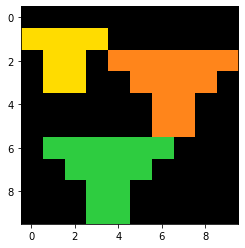

In [13]:
task=Trains[40]
basic_task = Create(task, 0)
if solve_connect(basic_task)!=-1:
    plot_picture(solve_connect(basic_task))

40 0


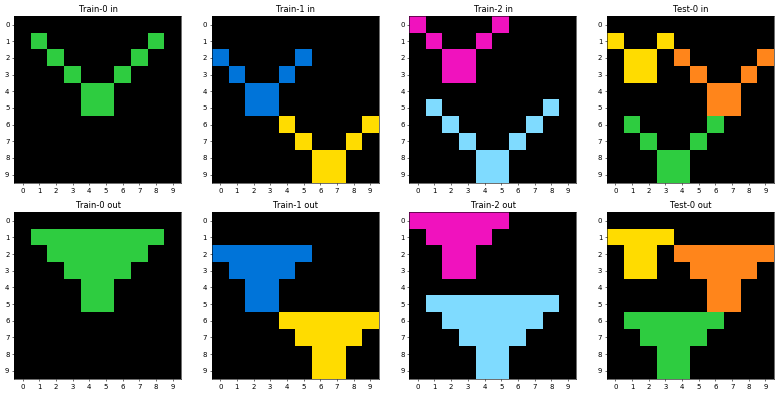

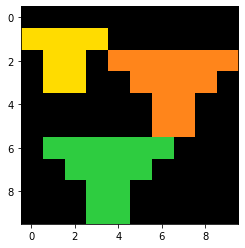

44 0


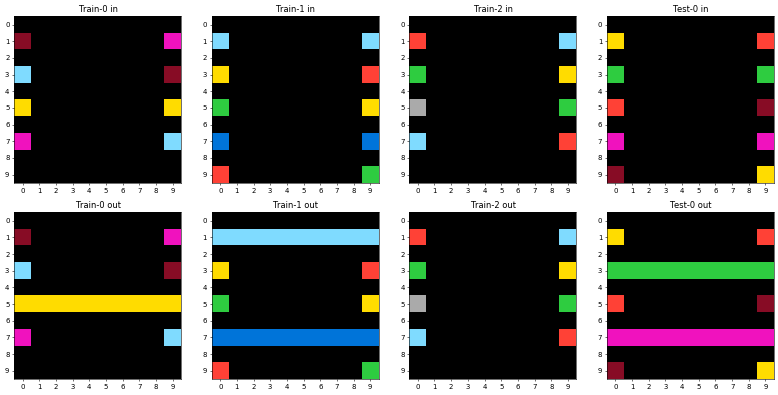

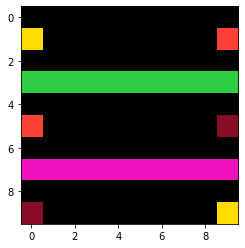

91 0


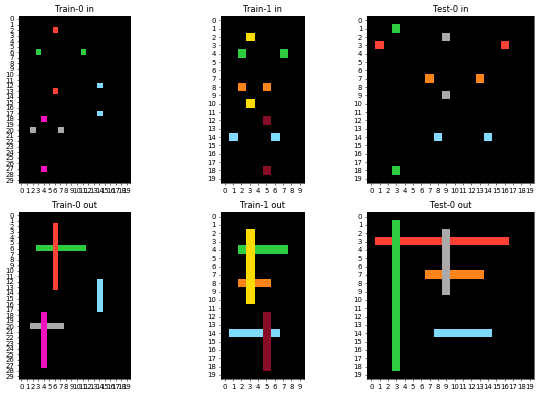

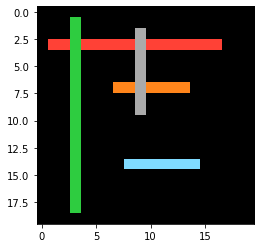

355 0


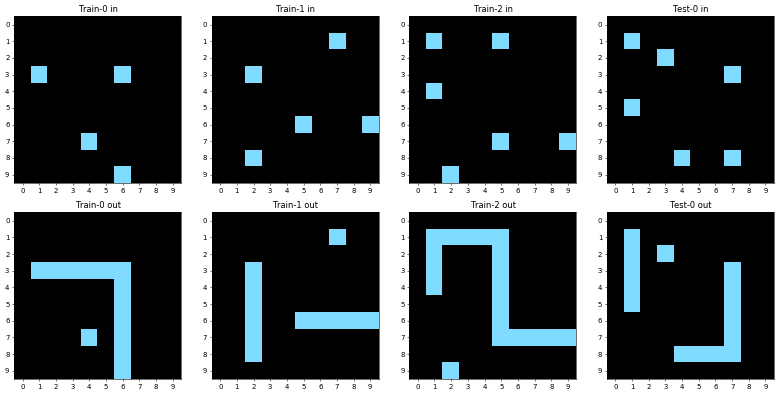

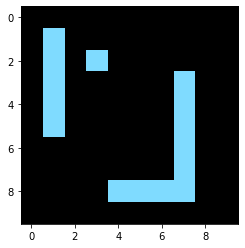

In [14]:
for i in range(400):
    task = Trains[i]
    k = len(task['test'])

    for j in range(k):        
        basic_task = Create(task, j)
        a=solve_connect(basic_task)
        if a!=-1:
            print(i,j)
            solved_id.add(i)
            plot_task(task)
            plot_picture(a)

In [15]:
#Trains[49] not completed

7 0


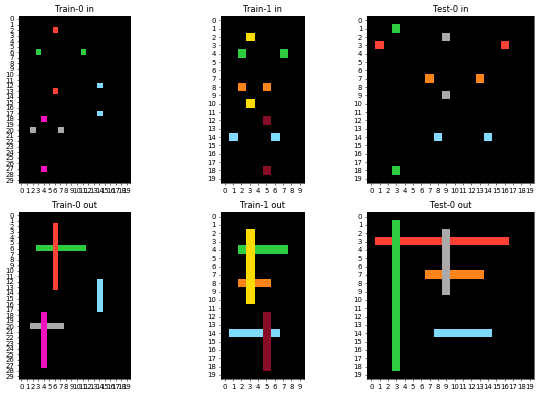

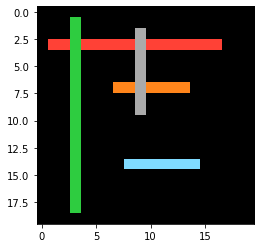

In [16]:
for i in range(400):
    task = Evals[i]
    k = len(task['test'])

    for j in range(k):        
        basic_task = Create(task, j)
        a=solve_connect(basic_task)
        if a!=-1:
            print(i,j)
            solved_eva_id.add(i)
            plot_task(task)
            plot_picture(a)

In [17]:
list(solved_id)

[40, 355, 91, 44]

In [18]:
list(solved_eva_id)

[7]